In [300]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Ridge
import math


# Loading Built-In Set

**Question 1**

- Loading `diabetes` dataset

In [301]:
diabetes: np.ndarray = load_diabetes()

**Question 2**

- Splitting data into training set and test set

In [302]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=1206)

In [303]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [304]:
# print a sample
print(X_train[0])

[-0.00551455 -0.04464164  0.02397278  0.00810098 -0.03459183 -0.03889169
  0.02286863 -0.03949338 -0.01599887 -0.01350402]


**Question 3**

- Computing $R^2$ for the `Lasso` model using default parameters

In [305]:
lasso: Lasso = Lasso().fit(X_train, y_train)

In [306]:
print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")

Training set score: 0.38147281844853587
Test set score: 0.3092790709781681


- Printing the number of features used in the model

In [307]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 3


- Printing names of the features used

In [308]:
print(f"Features used: {diabetes.feature_names}")

Features used: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [309]:
del X_train, X_test, y_train, y_test

# Loading Diabetes from File

**Question 4**

- Importing data from file 
- Each sample is separated by `	` hence it is set as the `delimiter`
- The header (first row) is skipped as it is not data

In [310]:
diabetes = np.genfromtxt('diabetes.data', delimiter='	', skip_header=1)

- Separating features `X` and labels `y`

In [311]:
X: np.ndarray = diabetes[:, :-1]
y: np.ndarray = diabetes[:, -1]

In [312]:
print("Whole Data: ", diabetes[0])
print("X: ", X[0])
print("y: ", y[0])

Whole Data:  [ 59.       2.      32.1    101.     157.      93.2     38.       4.
   4.8598  87.     151.    ]
X:  [ 59.       2.      32.1    101.     157.      93.2     38.       4.
   4.8598  87.    ]
y:  151.0


**Question 5**

- Splitting data into training sets and test sets

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1206)

**Question 6**

- Computing $R^2$ for the `Lasso` model using default parameters

In [314]:
lasso: Lasso = Lasso().fit(X_train, y_train)

In [315]:
print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")

Training set score: 0.5322897171515191
Test set score: 0.42628496708856434


- Printing the number of features used

In [316]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 9


- Printing names of features used
  - Loading the header from `diabetes.data` (as it was excluded)

In [317]:
header: np.ndarray = np.genfromtxt('diabetes.data', delimiter='	', max_rows=1, dtype=str)
print(header)

['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'Y']


## StandardScalar

**Question 7**

- Preprocessing data using `StandardScalar`

In [318]:
scaler: StandardScaler = StandardScaler()

X_train_scaled: StandardScaler = scaler.fit(X_train)
X_test_scaled: StandardScaler = scaler.fit(X_test)

X_train_scaled: StandardScaler = scaler.transform(X_train)
X_test_scaled: StandardScaler = scaler.transform(X_test)

**Question 8**

- Computing $R^2$ for the `Lasso` model using default parameters

In [319]:
lasso = Lasso().fit(X_train_scaled, y_train)

In [320]:
print(f"Training set score: {lasso.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso.score(X_test_scaled, y_test)}")

Training set score: 0.5337742073290201
Test set score: 0.4315961656558963


- Printing the number of features used in the model

In [321]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 8


- Printing names of features used

In [322]:
print(f"Features used: {header[:-1]}")

Features used: ['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6']


## Plotting

In [323]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso001.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso001.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.5394187103851991
Test set score: 0.4357485463667913
Number of features used: 10


In [324]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso00001.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso00001.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.5394260835459506
Test set score: 0.4355856643574041
Number of features used: 10


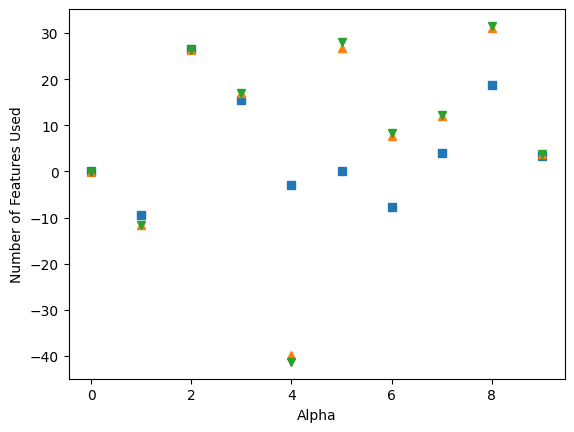

In [325]:
plt.xlabel("Alpha")
plt.ylabel("Number of Features Used")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

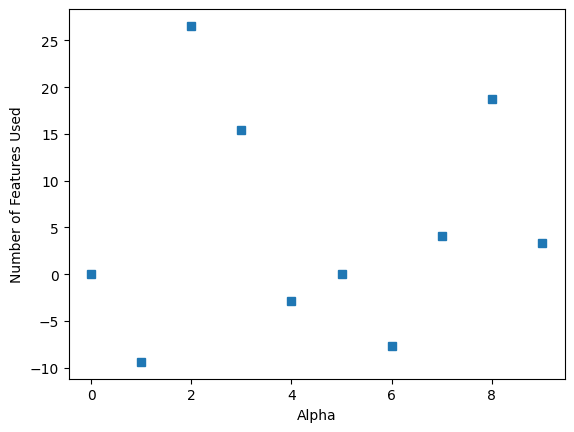

In [326]:
plt.xlabel("Alpha")
plt.ylabel("Number of Features Used")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
# plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
# plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

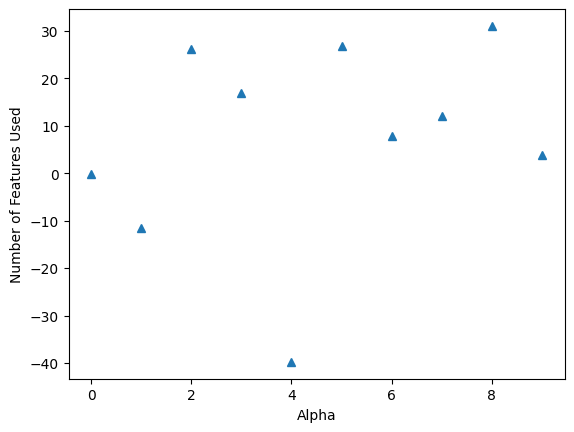

In [327]:
plt.xlabel("Alpha")
plt.ylabel("Number of Features Used")
# plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
# plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

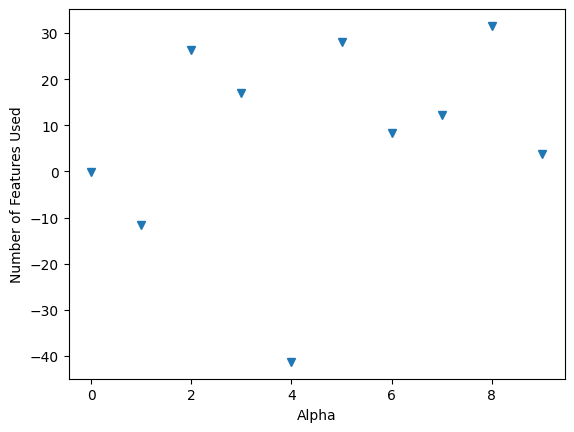

In [328]:
plt.xlabel("Alpha")
plt.ylabel("Number of Features Used")
# plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
# plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

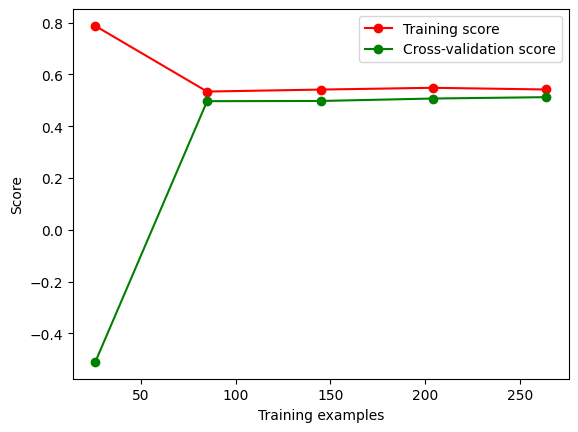

In [329]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=0.01, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.legend(loc="best")

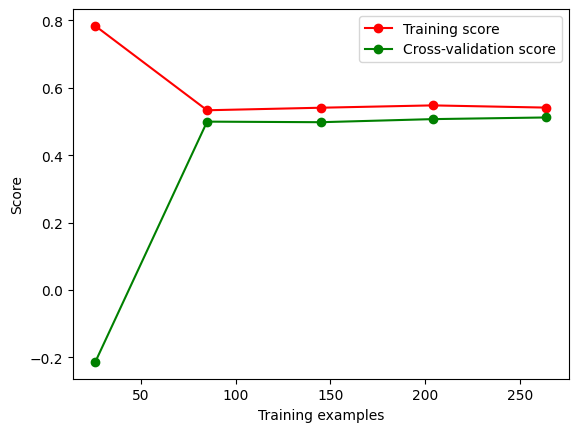

In [330]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=0.1, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.legend(loc="best")

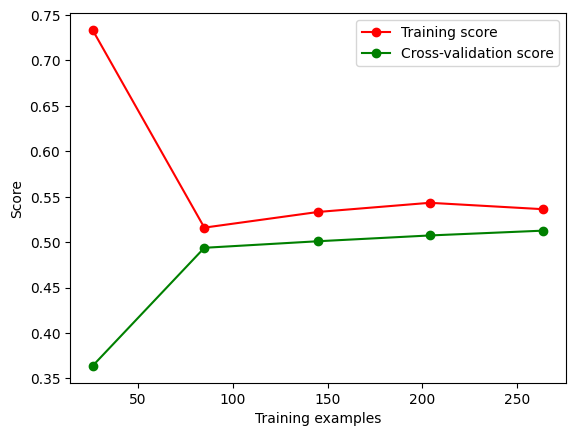

In [331]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=1, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.legend(loc="best")

## Regression Models

**Question 10**

### Grid Search

In [332]:
param_grid: dict[str, int] = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid: GridSearchCV = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print(f"Best cross-validation score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")

print(f"Training set score: {grid.score(X_train_scaled, y_train)}")
print(f"Test set score: {grid.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(grid.best_estimator_.coef_ != 0)}")

Best cross-validation score: 0.5130276864730194
Best parameters: {'alpha': 1}
Training set score: 0.5337742073290201
Test set score: 0.4315961656558963
Number of features used: 8


### Lasso

In [333]:
best_score: float = 0
for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
	lasso = Lasso(alpha=gamma, max_iter=100000).fit(X_train_scaled, y_train)
	score = lasso.score(X_test_scaled, y_test)
	if score > best_score:
		best_score = score
		best_parameters = {'alpha': gamma}

lasso = Lasso(**best_parameters).fit(X_train_scaled, y_train)

print(f"Best parameters: {best_parameters}")
print(f"Training set score: {lasso.score(X_train_scaled, y_train)}")
print(f"Test set score (cross-validation): {lasso.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Best parameters: {'alpha': 0.1}
Training set score: 0.5386930162142083
Test set score (cross-validation): 0.4367551192131277
Number of features used: 9


### Support Vector Regression

In [334]:
best_score: float = 0
for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
	for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
		svr = SVR(gamma=gamma, C=C).fit(X_train_scaled, y_train)
		score = svr.score(X_test_scaled, y_test)
		if score > best_score:
			best_score = score
			best_parameters = {'C': C, 'gamma': gamma}

svr = SVR(**best_parameters).fit(X_train_scaled, y_train)

print(f"Best parameters: {best_parameters}")
print(f"Training set score: {svr.score(X_train_scaled, y_train)}")
print(f"Test set score (cross-validation): {svr.score(X_test_scaled, y_test)}")
print(f"Number of support vectors: {svr.support_vectors_.shape[0]}")

Best parameters: {'C': 100, 'gamma': 0.01}
Training set score: 0.5605745648309347
Test set score (cross-validation): 0.4402521028312093
Number of support vectors: 331


### Ridge Regression

In [335]:
best_score: float = 0
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]: # try different values for alpha
	ridge: Ridge = Ridge(alpha=alpha) # build the model
	ridge.fit(X_train, y_train) # train the model
	score: float = ridge.score(X_test, y_test) # evaluate the model on the test set
	if score > best_score: # if we got a better score, store the score and parameters
		best_score = score # store the best score
		best_parameters = {'alpha': alpha} # store the best parameters

ridge: Ridge = Ridge(**best_parameters) # build the model with the best parameters
ridge.fit(X_train, y_train) # train the model

print(f"Best parameters: {best_parameters}")
print(f"Training set score: {ridge.score(X_train, y_train)}") # evaluate the model on the training set
print(f"Test set score: {ridge.score(X_test, y_test)}") # evaluate the model on the test set
print(f"Number of features used: {np.sum(ridge.coef_ != 0)}") # count the number of features used

Best parameters: {'alpha': 0.001}
Training set score: 0.5394260840483416
Test set score: 0.4355826857407178
Number of features used: 10


### Comparison

#### Accuracy

- Comparing accuracy between several regression models
  - Grid Search
  - Lasso
  - Support Vector Regression
  - Ridge Regression
- The accuracy between all the models seems to be consistent

Text(0.5, 0, 'Model')

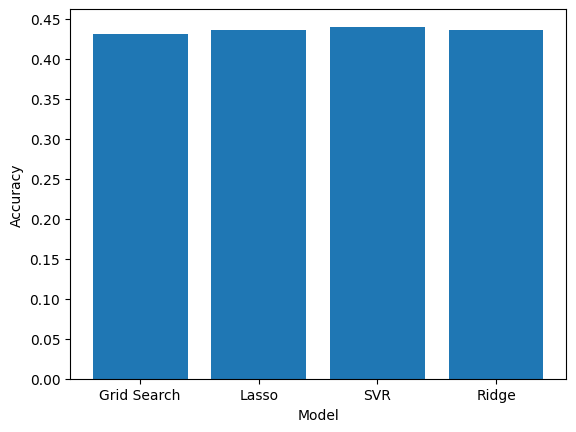

In [336]:
plt.bar(['Grid Search', 'Lasso', 'SVR', 'Ridge'], [grid.score(X_test_scaled, y_test), lasso.score(X_test_scaled, y_test), svr.score(X_test_scaled, y_test), ridge.score(X_test, y_test)])
plt.yticks(np.arange(0, 0.5, 0.05))
plt.ylabel('Accuracy')
plt.xlabel('Model')

#### Number of Features

- Comparing number of features used by each model
- Support Vector Regression uses the highest number of feature
- Lasso, Grid Search and Ridge all use around the same number of features

Text(0.5, 0, 'Model')

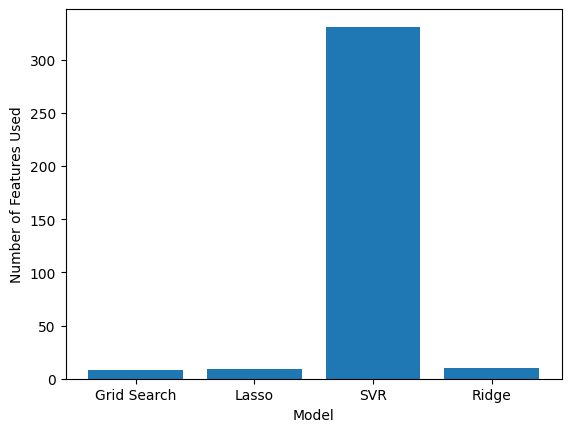

In [337]:
plt.bar(['Grid Search', 'Lasso', 'SVR', 'Ridge'], [np.sum(grid.best_estimator_.coef_ != 0), np.sum(lasso.coef_ != 0), svr.support_vectors_.shape[0], np.sum(ridge.coef_ != 0)])
plt.ylabel('Number of Features Used')
plt.xlabel('Model')

#### Best Alpha

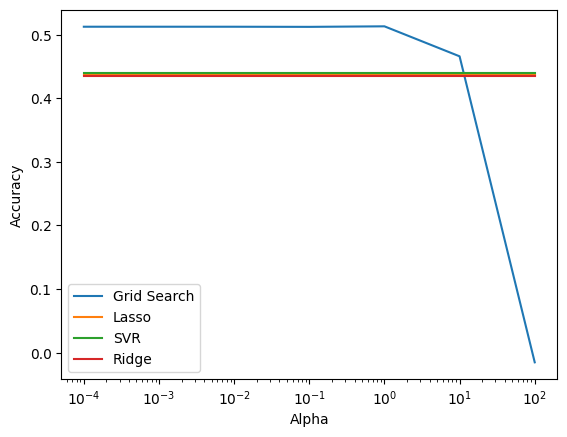

In [338]:
# compare alpha values for all models
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], grid.cv_results_['mean_test_score'], label='Grid Search')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], [lasso.score(X_test_scaled, y_test)] * 7, label='Lasso')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], [svr.score(X_test_scaled, y_test)] * 7, label='SVR')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], [ridge.score(X_test, y_test)] * 7, label='Ridge')
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.xscale('log') # use a logarithmic scale for the x-axis
plt.legend()

Text(0.5, 0, 'Model')

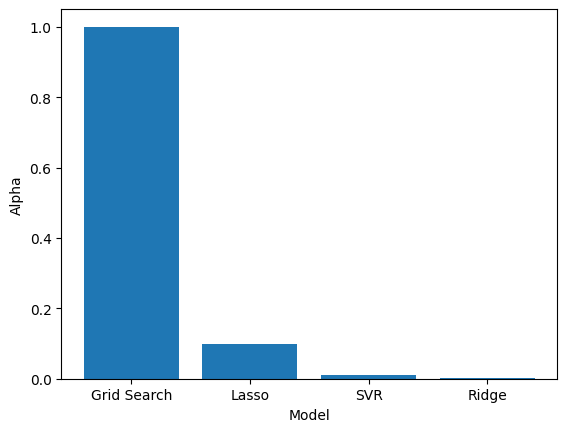

In [339]:
# compare best alpha values for all models in bar chart
plt.bar(['Grid Search', 'Lasso', 'SVR', 'Ridge'], [grid.best_params_['alpha'], lasso.alpha, svr.gamma, ridge.alpha])
plt.ylabel('Alpha')
plt.xlabel('Model')


# Conformal Prediction

**Question 11**

## Splitting Data into Training Set Proper & Validation Sets

*Part A*

- Splitting the data into training set and test set again (just in case)
  - As the variables may have been tempered with
- Splitting the training set into training set and validation set
  - Similar to splitting data into test and training sets
  - `test_size` in this case validation size is 99

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1206) # split the data into training and test sets
X_train_pr, X_val, y_train_pr, y_val = train_test_split(X_train, y_train, test_size=99, random_state=1206) # split the training set into training and validation sets

In [341]:
print(f"X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape}") # print the shapes of the validation set

X_val.shape: (99, 10), y_val.shape: (99,)


## Normalize Data

*Part B*

In [342]:
scalar: StandardScaler = StandardScaler()

X_train_pr_scaled: np.ndarray = scalar.fit(X_train_pr)
X_train_pr_scaled: np.ndarray = scalar.transform(X_train_pr)

X_val_scaled: np.ndarray = scalar.fit(X_val)
X_val_scaled: np.ndarray = scalar.transform(X_val)

## Computing Distance

*Part C*

- Function computes the distance between 2 points 
  - One point will be used from the training set and the other from the testing set
  - The last column is excluded as it is a label where the first few rows are features
  - $(sample.x, label.y)$

In [343]:
# compute distance between 2 points in the validation set and test set
def distance(x1: np.ndarray, x2: np.ndarray) -> float:
	"""Computes the distance between 2 points using the Euclidean distance formula.

	Args:
		x1 (np.ndarray): distance from point 1
		x2 (np.ndarray): distance to point 2

	Returns:
		float: distance between 2 points
	"""
	return np.sqrt(np.sum((x1 - x2) ** 2))

In [344]:
print(distance(X_train_pr_scaled[0], X_val_scaled[1]))

5.37794705193643


## Computing Scores

- Function computes the modulus of a `number`
  - $|number|$ 
- This is required for the formula $ɑ = |y-\hat{y}|$

In [345]:
def modulus(number: float) -> float:
	"""Computes the modulus of a number.

	Args:
		number (float): number to compute the modulus of

	Returns:
		float: modulus of the number
	"""
	if (number < 0):
		return -number
	return number

- Computes the score for each combination of nearest neighbours between the calibration set and proper set
- The `score` is $ɑ = |y-\hat{y}|$

In [346]:
def score(x1: np.ndarray, x2: np.ndarray) -> float:
	"""Computes the score by subtracting the distance between the calibration and test sample.

	Args:
		x1 (np.ndarray): calibration sample
		x2 (np.ndarray): test sample

	Returns:
		float: score
	"""
	return modulus(x1 - x2)

In [347]:
print(score(y_train_pr[0], y_val[1]))

209.0


## Sorting Distances by Score

- Sorts the list in ascending order by `score`

In [348]:
def sort(table: list[dict[str, any]]) -> list[dict[str, any]]:
	"""Sorts the table by score.

	Args:
		table (list[dict[str, any]]): table to sort

	Returns:
		list[dict[str, any]]: sorted table
	"""
	return sorted(table, key=lambda table : table[0][3])

## Final Algorithm

- Returns a table containing:
  - Combination of evaluation sample and nearest proper sample
  - For each combination, it stores the distances and score
- Algorithm:
  - For each calibration sample, it computes the closest proper training sample which are both then stored
  - The distance between the calibration sample and proper training sample is also stored
  - The score is computed by using the following formula $ɑ = |y-\hat{y}|$ which is then stored
  - The list is then sorted in ascending order by its score

In [349]:
def conformal_prediction(X_train: np.ndarray, X_val: np.ndarray, y_train: np.ndarray, y_val: np.ndarray) -> list[dict]:
	"""Computes the conformal prediction.
	Returns a sorted list of dictionaries with the following keys:
		- 'calibration': calibration sample
		- 'proper': proper training sample
		- 'distance': distance between the calibration and proper training sample
		- 'score': |y-yhat|

	Args:
		X_train (np.ndarray): proper training features
		X_val (np.ndarray): calibration features
		y_train (np.ndarray): proper training labels
		y_val (np.ndarray): calibration labels

	Returns:
		list[dict]: sorted list of dictionaries
	"""
	tables: list = []
	for X_val_index, X_val_element in enumerate(X_val):
		for X_train_index, X_train_element in enumerate(X_train):
			table: list = [0, 0, 0, 0]
			table[0] = X_train_element
			table[1] = X_val_element
			table[2] = distance(X_train_element, X_val_element)
			table[3] = score(y_train[X_train_index], y_val[X_val_index])
			tables.append(table)
	return sort(tables)
	# return (tables)

In [350]:
table: list = conformal_prediction(X_train_pr_scaled, X_val_scaled, y_train_pr, y_val)

In [351]:
# row: int = 0
# for key in (table[0].keys()):
# 	print(f"- {key}: {table[row][key]}")

In [352]:
for i in range(5):
	print(table[i][3])

73.0
229.0
14.0
55.0
12.0


## Compute Predicted Sample $k$

- The predicted sample is computed with the following formula:
$$k=(1-ε)(m+1)$$

In [353]:
def compute_predicted_sample(tables: list[dict], epsilon: float) -> float:
	"""Computes the predicted label
	
	Args:
		tables (list[dict]): sorted list of dictionaries
		epsilon (float): significance level
		
		Returns:
			float: predicted label	
	"""
	return ((1 - epsilon) * (len(tables) + 1))

In [354]:
k_1: float = compute_predicted_sample(table, 0.05)
k_2: float = compute_predicted_sample(table, 0.2)

print(f"K_1 (0.05): ", k_1)
print(f"K_2 (0.2): ", k_2)

K_1 (0.05):  21820.55
K_2 (0.2):  18375.2


In [355]:
# def get_prediction(k: float, y_train_pr) -> float:
# 	current_highest_distance: float = 0
# 	for index, element in enumerate(y_train_pr):
# 		# convert vector y_train_pr to scalar
		
# 	x: float = distance(X_train_pr, k)
# 	print(x)

# get_prediction(k_1, y_train_pr[0])

In [356]:
# compute length of the prediction intervals for the test set
def compute_prediction_interval_length(tables: list[dict], k: float) -> float:
	"""Computes the length of the prediction interval.

	Args:
		tables (list[dict]): sorted list of dictionaries
		k (float): predicted sample

	Returns:
		float: length of the prediction interval
	"""
	return tables[int(k)][2]

## New

### Lasso

In [357]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

c = 0.05
best_score_conformal = np.NINF

while c <= 5:
	lasso_model_check = Lasso(alpha=c).fit(X_train_pr_scaled, y_train_pr)
	scores_conformal = cross_val_score(lasso_model_check, X_train_pr_scaled, y_train_pr, cv=5)
	scores_conformal = np.mean(scores_conformal)
	c += 0.05
	if scores_conformal > best_score_conformal:
		alpha_optimal_conformal = c
		best_score_conformal = scores_conformal

lasso_model = Lasso(alpha=alpha_optimal_conformal).fit(X_train_pr_scaled, y_train_pr)
print(f"Optimal alpha: {alpha_optimal_conformal}")
print(f"Best score: {best_score_conformal}")

Optimal alpha: 0.1
Best score: 0.5139464064158494


### Inductive Conformal Prediction

In [358]:
def compute_alpha(y_hat_calibration_list: np.ndarray, y_val: np.ndarray) -> np.ndarray:
	return (np.sort(abs(y_hat_calibration_list - y_val))) # alpha values for the calibration set alpha = |y-hat - y|

def compute_k(alpha_values: np.ndarray, significance_level: float) -> int:
	return (math.ceil((1 - significance_level) * len(alpha_values))) # k = ceil((1 - significance_level) * len(alpha_values))

def compute_test_error(y_test: np.ndarray, count_c: int) -> float:
	return (len(y_test) - count_c) / len(y_test) # formula = (n - count) / n

def compute_amplitude(y_hat_test_list: np.ndarray) -> list[int, list[float]]:
	y_c: list[tuple[float]] = [[]] # list of (sample, distance)
	count_c: int = 0 # number of samples within the prediction interval
	amplitude: list[float] = [] # list of amplitudes
	
	for index, element in enumerate(y_hat_test_list): # for each element in the test set
		y_min: float = element - c # y_min = y_hat - c
		y_max: float = element + c # y_max = y_hat + c
		y_c.append((y_min, y_max)) # append the interval to the list of intervals

		amplitude.append(abs(y_max - y_min)) # append the length of the interval to the list of lengths

		if y_min <= element <= y_max: # if the element is in the interval
			count_c += 1 # increment the count

	return (count_c, amplitude)

def conformal(X_val_scaled: np.ndarray, y_val: np.ndarray, X_test_scaled: np.ndarray, y_test: np.ndarray, significance_level: float):
	y_hat_test_list: list[float] = lasso_model.predict(X_val_scaled) # y-hat test set
	count_c, amplitude = compute_amplitude(y_hat_test_list)
	y_hat_calibration_list: np.ndarray = lasso_model.predict(X_val_scaled) # y-hat calibration set
	alpha_values: list[float] = compute_alpha(y_hat_calibration_list, y_val) 
	k: int = compute_k(alpha_values, significance_level) 
	c: float = alpha_values[k] # c value for the calibration set
	test_error: float = compute_test_error(y_test, count_c) # compute the test error
	return (c, test_error, amplitude)

In [359]:
c, test_error, amplitude = conformal(X_val_scaled, y_val, X_test_scaled, y_test, 0.05)
print(f"Error Rate: {test_error}")
print(f"Amplitude (Length of Interval): {np.mean(amplitude)}")

Error Rate: 0.10810810810810811
Amplitude (Length of Interval): 10.09999999999997


In [360]:
c, test_error, amplitude = conformal(X_val_scaled, y_val, X_test_scaled, y_test, 0.2)
print(f"Error Rate: {test_error}")
print(f"Amplitude (Length of Interval): {np.mean(amplitude)}")

Error Rate: 0.10810810810810811
Amplitude (Length of Interval): 261.09884503133054
